# PCA (Principal component analysis)

### Теория

**Цель:**
* подбор низкоразмерного представления матрицы объекты-признаки с сохранением наибольшего количества информации. Представление ищется в линейном виде, то есть новые признаки - линейная комбинация старых. 

**Зачем это нужно:**
* увеличиение производительности алгоритмо машинного обучения. 
* борьба с нестабильностью призанков.
* визуализация данных.

**Математическая запись идеи**

$f_1, f_2, \dots{}, f_n$- старые признаки

$g_1, f_2, \dots{}, g_m$- новые признаки, $m << n$

Cтарые признаки должны быть линейно восстановимы по новым:

$$\hat{f}_j(x) = \sum_{s=1}^{m}g_su_{js}$$

При этом мы хотим, чтобы восстановление было как можно более точным:

$$\sum_{i=1}^{l} \sum_{j=1}^{n} (\hat{f}_j(x_i) - f_j(x_i))^2 \to \min$$

В матричном виде мы получим следующее выражение:

$$||GU^T-F||^2 \to min, $$
где 
$F \in R^{l \times n}$, $G \in R^{l \times m}$, $U \in R^{m \times m}$.

**Основная теорема**

Если $m << rkF$, то минимум $||GU^T-F||^2$ достигается, когда столбцы U это собственные векторы $F^TF$, соответсвующее $m$ максимальным собственным значениям $\lambda_1, ... , \lambda_m$, а $G=FU$.

При этом:
* $U$ - ортонормированная, $U^TU=I$
* $G$ - ортогональная, $G^TG= \mbox{diag}(\lambda_1, ... , \lambda_m)= \Lambda$
* Невязка: $||GU^T-F||^2 = ||F||^2 - tr\Lambda = \sum_{j=m+1}^{n}\lambda_j$

При $G = V\sqrt{\lambda}$ представление $F=GU^T$ совпадает с сингулярным разложением матрицы $F$.

**Кратко о сингулярном разложении**

Любая прямоугольная матрица $F$ представим в виде: $F = V \Lambda U^T$.

Столбцы матриц $U$ и $V$ называются соответственно левыми и правыми сингулярными векторами, а значения диагонали матрицы $\Lambda$ называются сингулярными числами.

Также можно показать, что столбцы матрицы V являются собственными векторами матрицы $FF^T$, а квадраты сингулярных чисел $\Lambda=\mbox{diag}(\lambda_1,...,\lambda_r)$ — ее собственными числами. Также столбцы матрицы U являются собственными векторами матрицы $F^TF$, а квадраты сингулярных чисел являются ее собственными числами.

**Геометрический смысл**

Пусть матрице F поставлен в соответствие линейный оператор. 

Линейный оператор, отображающий элементы пространства в себя представим в виде последовательно выполняемых линейных операторов вращения, растяжения и вращения. ($U, V$ - вращения, $\Lambda$ - растяжение)

Вспомним дополнительно, что образом любого линейного преобразования, примененного к единичной сфере является гиперэллипсоид. Гиперэллипсоид можно определить как поверхность, полученную в результате растяжения единичной сферы вдоль каких-то ортогональных направлений. 

Пусть тогда $U$ задает единичную сферу, подействовав на нее оператором $A$ мы получим некоторй гиперэллипсоид. Однако этот гиперэллипсоид можно описать и другим образом $V\Lambda$. $U, V$ - ортогональные матрицы, $\Lambda$ - длина главных осей гиперэллипсоид. Тогда мы получаем:

$$AU=V\Lambda$$
$$A=V\Lambda U^{-1}=V\Lambda U^{T}$$

**Получается, что сингулярные значения отвечают насколько гиперэллипсоид растянут в пространстве, то есть данные разбросаны вдоль ортогональных направлений. Тогда метод главных компонент избавляется от осей, в которых разброс минимален, то есть которые несут меньше всего информации о данных.**

**Практическое применение**
* Данные необходимо стандартизовать перед применением алгоритма
* Обычно оставляют столько компонент, чтобы сохранялосб 90% объясненной дисперсии.

### PCA from scratch

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split # cross_validation 
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression 
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt 
%matplotlib inline

In [7]:
data = pd.read_csv('wine.data', header=None)

X, y = data.loc[:, 1:].values, data.loc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
cov_mat = np.cov(X_train.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat) 
total_sum = sum(eigen_vals)
explained_var = [ev/total_sum for ev in sorted(eigen_vals, reverse=True)]
cum_sum = np.cumsum(explained_var)

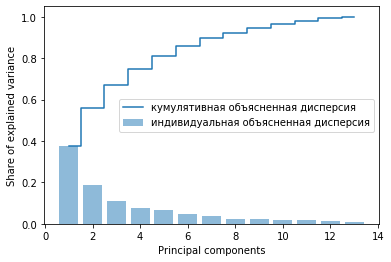

In [9]:
plt.bar(range(1, X_train.shape[1]+1), explained_var, alpha=0.5, align='center', label='индивидуальная объясненная дисперсия')
plt.step(range(1, X_train.shape[1]+1), cum_sum, where='mid', label='кумулятивная объясненная дисперсия')
plt.ylabel('Share of explained variance') 
plt.xlabel('Principal components') 
plt.legend(loc='best')
plt.show()

In [10]:
eigen_pairs =[(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))

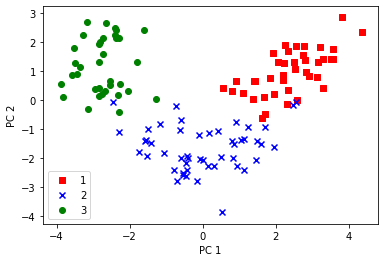

In [11]:
X_train_pca = X_train @ w 

colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    
    plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1], c=c, label=l, marker=m) 
plt.xlabel('PC 1')
plt.ylabel('PC 2') 
plt.legend(loc='lower left') 
plt.show ()

### PCA with sklearn

In [12]:
def plot_decision_regions (X, y, classifier, resolution=.02) :
    # задать генератор маркеров и палитру
    markers = ('s', 'x', 'o','^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan') 
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # вывести поверхности решений
    xl_min, xl_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(xl_min, xl_max, resolution),
    np.arange(x2_min, x2_max, resolution)) 
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap) 
    plt.xlim(xx1.min(), xx1.max()) 
    plt.ylim(xx2.min(), xx2.max())
    
    # вывести образцы классов
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


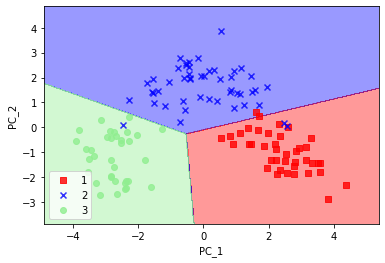

In [15]:
pca = PCA(n_components=2)
lr = LogisticRegression()

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

lr.fit(X_train_pca, y_train) 

plot_decision_regions(X_train_pca, y_train, classifier=lr) 
plt.xlabel('PC_1')
plt.ylabel('PC_2') 
plt.legend(loc='lower left') 
plt.show()

### Kernel PCA theory

Предположим, что мы хотим перейти из текущего пространство в некоторое другое бОльшей размерности.

$$\phi : R^d \to R^k, k >> d$$

Тогда нам нужно будет искать собственные вектора от  
$$\frac{1}{n} \sum_{i}^n \phi(f_i) \phi(f_i)^T$$
То есть мы предполагаем, что для каждого x, мы должны перевести его в пространство бОльшей размерности, а потом посчитать скалярное произведение для полученных данных. Однако такой подход является очень вычислительно затратным.

Поэтому тут на помощь нам придет kernel trick. 
Пусть существует функция $K(f_1, f_2) = <\phi(f_1), \phi(f_2)>$. Тогда мы можем не вычислять попарные скалярные произведения, а сразу применить K. 

Например, $f\in R^d$ и $f=[f_1,f_2]$, а мы хотим применить следующую функцию $\phi$ так чтобы  $f^* = [f_1, \sqrt{2f_1f_2}, f_2]$. 
Для этой функции $<\phi(f), \phi(f)> = f_1^2+2f_1f_2+f_2^2=(f_1+f_2)^2= K(f,f)$

### Kernel PCA from scratch

In [16]:
from scipy.spatial.distance import pdist, squareform 
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    
    sq_dists = pdist(X, 'sqeuclidean')
    mat_sq_dists = squareform(sq_dists)

    K = exp(-gamma * mat_sq_dists)
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n @ K - K @ one_n + one_n @ K @ one_n
    eigvals, eigvecs = eigh(K)
    X_pc = np.column_stack((eigvecs[:, -i] for i in range(1, n_components + 1)))
       
    return X_pc

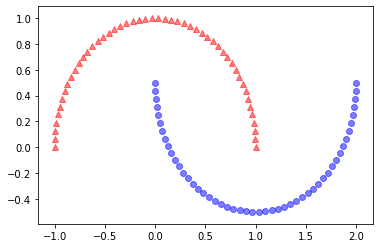

In [17]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, random_state=123) 

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.5) 
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.show()

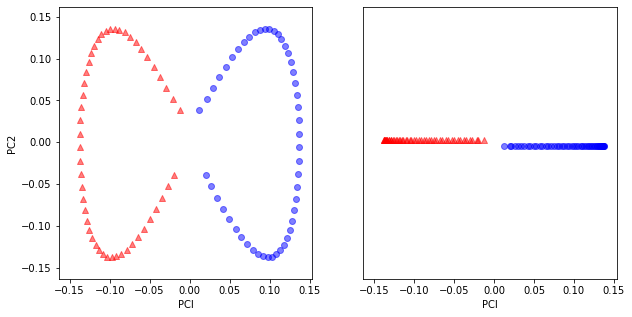

In [18]:
from matplotlib.ticker import FormatStrFormatter 

X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2) 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', marker='^', alpha=0.5) 
ax1.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', marker='o', alpha=0.5)
ax2.scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=0.5)
ax2.scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02, color='blue', marker='o', alpha=0.5)

ax1.set_xlabel('PCI')
ax1.set_ylabel('РС2')
ax2.set_ylim([-1, 1])
ax2.set_yticks([])
ax2.set_xlabel('PCI')
fig.show()

Предыдущая функция не поможет нам спроецировать новый набор данных, например, тестовый, в новое пространство. Поэтому нам нужно поменять функцию.
В нашем случае $F^TF = \frac{1}{n}K$. Тогда собственный вектора $a$ будет $\frac{1}{n}Ka=\lambda a$.

In [19]:
def rbf_kernel_pca(X, gamma, n_components):
    
    sq_dists = pdist(X, 'sqeuclidean')
    mat_sq_dists = squareform(sq_dists)
    K = exp(-gamma * mat_sq_dists)
    
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
                     
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    eigvals, eigvecs = eigh(K)
    alphas = np.column_stack((eigvecs[:, -i] for i in range(1, n_components + 1))) 
    lambdas = [eigvals[-i] for i in range(1,n_components+1)]
                     
    return alphas, lambdas

In [20]:
X, y = make_moons(n_samples=100, random_state=123)
alphas, lambdas = rbf_kernel_pca(X, gamma=15, n_components=1)

In [21]:
x_new = X[25] #было
x_proj = alphas[25] #стало

def project_x(X_new, X, gamma, alphas, lambdas): #X_new - что хотим получить в новом подпространстве X - старая матрица
    
    pair_dist = np.array([np.sum((x_new-row)**2) for row in X]) 
    k = np.exp(-gamma * pair_dist)
    
    return k.dot(alphas / lambdas)

Проверка

In [22]:
x_reproj = project_x(x_new, X, gamma=15, alphas=alphas, lambdas=lambdas)

In [23]:
print(x_new, x_proj)

[1.8713187  0.00928245] [0.07877284]


In [24]:
x_reproj

array([0.07877284])

### Kernel PCA from sklearn

In [25]:
from sklearn.decomposition import KernelPCA

X, y = make_moons(n_samples=100, random_state=123)

scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15) 
X_skernpca = scikit_kpca.fit_transform(X)

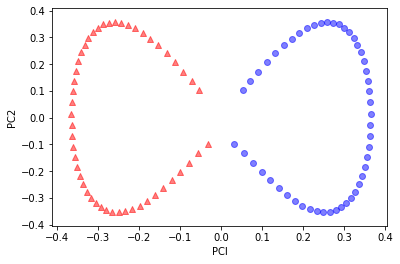

In [27]:
plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.xlabel('PCI') 
plt.ylabel('PC2') 
plt.show()